# **Replicating Paper 4: Implementing Tensor Decomposition for Feature Extraction in Python**

## **Background**
In the context of high-dimensional data analysis, such as facial recordings or image datasets, traditional feature extraction methods often fall short due to the **curse of dimensionality**. **Higher Order Discriminant Analysis (HODA)** addresses this by leveraging **tensor representations**, which preserve the multi-dimensional structure of the data. This problem statement focuses on implementing the **HODA algorithm** for feature extraction and classification using tensor decompositions as introduced in the paper [**Tensor decompositions for feature extraction and classification of high dimensional datasets(by Anh-Huy Phan and Andrzej Cichocki)** ](https://www.researchgate.net/publication/228553771_Tensor_decompositions_for_feature_extraction_and_classification_of_high_dimensional_datasets).

## **Objective**
The objective is to develop and implement the **Higher Order Discriminant Analysis (HODA) algorithm** to extract discriminative features from high-dimensional tensor data and classify test tensors effectively. The algorithm will **optimize the basis matrices** through tensor decomposition to **maximize class separation**, ensuring that features extracted from the training data distinctly represent different classes. This optimized feature representation will then be used to classify new tensors and evaluate the classification performance, enhancing accuracy in high-dimensional data analysis.

**The Appendix section illustrates the use of Principal Component Analysis (PCA) for compression using the faces dataset at the end.**



## **Problem Statement**
Given a set of training tensors $\mathbf{X}^{(k)} \in \mathbb{R}^{I_1 \times I_2 \times \dots \times I_N}$ for $k = 1, 2, \dots, K$, each labeled with a class $c_k \in \{1, 2, \dots, C\}$, and a set of test tensors $\mathbf{\dot{X}}^{(t)} \in \mathbb{R}^{I_1 \times I_2 \times \dots \times I_N}$ for $t = 1, 2, \dots, T$, the challenge is to classify the test tensors accurately. The classification process involves three main steps:

1. Feature Extraction for Training Data:
   - Find the basis matrices $\mathbf{U}^{(n)} \in \mathbb{R}^{I_n \times J_n}$ for $n = 1, 2, \dots, N$ that maximize class separation.
   - Compute the core tensors $\mathbf{G}^{(k)} \in \mathbb{R}^{J_1 \times J_2 \times \dots \times J_N}$ for each training tensor $\mathbf{X}^{(k)}$.

2. Feature Extraction for Test Data:
   - Use the basis matrices $\mathbf{U}^{(n)}$ derived from the training data to extract features from the test tensors $\mathbf{\dot{X}}^{(t)}$, resulting in core tensors $\mathbf{\dot{G}}^{(t)}$.

3. Classification:
   - Train a multinomial SVM using the training features $\mathbf{G}^{(k)}$.
   - Classify the test features $\mathbf{\dot{G}}^{(t)}$ and evaluate the model's accuracy.

## **Mathematical Formulation**
The relationship between a sample tensor $\mathbf{X}^{(k)}$ and the basis matrices $\mathbf{U}^{(n)}$ is expressed as:
$$
\mathbf{X}^{(k)} = \mathbf{G}^{(k)} \times_1 \mathbf{U}^{(1)} \times_2 \mathbf{U}^{(2)} \dots \times_N \mathbf{U}^{(N)}
$$
where $\mathbf{G}^{(k)}$ is the core tensor representing the features.

The optimization problem for finding the basis matrices involves maximizing the between-class scatter while minimizing the within-class scatter:
$$
\varphi = \arg \max_{\mathbf{U}^{(1)}, \dots, \mathbf{U}^{(N)}} \frac{\sum_{c=1}^{C} K_c \| \bar{\mathbf{G}}^{(c)} - \bar{\mathbf{G}} \|_F^2}{\sum_{k=1}^{K} \| \mathbf{G}^{(k)} - \bar{\mathbf{G}}^{(c_k)} \|_F^2}
$$
where:
- $\bar{\mathbf{G}}^{(c)}$ is the mean core tensor of class $c$.
- $\bar{\mathbf{G}}$ is the mean core tensor of all training samples.
- $K_c$ is the number of training samples in class $c$.

The within-class scatter matrix $S_w^{(n)}$ and the between-class scatter matrix $S_b^{(n)}$ are given by:

$$
S_w^{(n)} = \sum_{k=1}^{K} \langle \tilde{\mathbf{Z}}_{-n}^{(k)}, \tilde{\mathbf{Z}}_{-n}^{(k)} \rangle_{-n}
$$

$$
S_b^{(n)} = \sum_{c=1}^{C} \langle \hat{\mathbf{Z}}_{-n}^{(c)}, \hat{\mathbf{Z}}_{-n}^{(c)} \rangle_{-n}
$$

where:
- $\tilde{\mathbf{Z}}_{-n}^{(k)} = \tilde{\mathbf{X}^{(k)} } \times _{- \left( n, N + 1 \right)} { \{U ^ T\} }$.
- $\hat{\mathbf{Z}}_{-n}^{(c)} = \sqrt{K_c} (\bar{\mathbf{X}}^{(c)} - \bar{\mathbf{X}}) \times _{- \left( n, N + 1 \right)} { \{U ^ T\}  }
$.

The basis matrix $\mathbf{U}^{(n)}$ is found by solving:

$$
\varphi = \arg \max_{\mathbf{U}^{(n)}} \frac{\text{trace}(\mathbf{U}^{(n)T} S_b^{(n)} \mathbf{U}^{(n)})}{\text{trace}(\mathbf{U}^{(n)T} S_w^{(n)} \mathbf{U}^{(n)})}
$$

## **Steps to Implement**
1. Initialize Basis Matrices: Randomly initialize the basis matrices $\mathbf{U}^{(n)}$.
2. Iterative Optimization:
   - Fix $\mathbf{U}^{(1)}, \dots, \mathbf{U}^{(n-1)}, \mathbf{U}^{(n+1)}, \dots, \mathbf{U}^{(N)}$ and optimize $\mathbf{U}^{(n)}$ by maximizing the trace ratio.
   - Update the basis matrices iteratively until convergence.
3. Feature Extraction:
   - Decompose the training tensors $\mathbf{X}^{(k)}$ to obtain $\mathbf{G}^{(k)}$.
   - Extract features from test tensors $\mathbf{\dot{X}}^{(t)}$ using the learned basis matrices to get $\mathbf{\dot{G}}^{(t)}$.
4. Classification:
   - Train a multinomial SVM using the training features $\mathbf{G}^{(k)}$.
   - Classify the test features $\mathbf{\dot{G}}^{(t)}$ and evaluate the model's performance.

By implementing the above steps, the **HODA algorithm** will facilitate effective **feature extraction** and **classification** of high-dimensional tensor data, leveraging the inherent multi-dimensional structure to improve **classification accuracy**.


## **Pseudocode: HODA Algorithm for Feature Extraction (Page 16)**  

**Input:**
- $X$: Concatenated tensor of $K$ training samples ($I_1 \times I_2 \times \cdots \times I_N \times K$)
- $G$: Training feature tensors ($J_1 \times J_2 \times \cdots \times J_N \times K$)

**Output:**
- $U(n)$: $N$ orthogonal basis factors ($I_n \times J_n$ for $n = 1, 2, \ldots, N$)

**Steps:**

1. **Initialize:**
   - Initialize $U(n)$

2. **Calculate $\tilde{X}$ and $\hat{X}$:**
   - Compute $\tilde{X}$ and $\hat{X}$ according to equations (60) and (63)

3. **Iterate Until Convergence:**

   4. **For each dimension $n$ from 1 to $N$:**

      5. **Compute $\tilde{Z}$:**
         $$
         \tilde{Z} = \tilde{X} \times_{-(n,N+1)} U^T
         $$

      6. **Compute Within-Class Scatter Matrix $S_{-n}^w$:**
         $$
         S_{-n}^w = \langle \tilde{Z}, \tilde{Z} \rangle - n
         $$

      7. **Compute $\hat{Z}$:**
         $$
         \hat{Z} = \hat{X} \times_{-(n,N+1)} U^T
         $$

      8. **Compute Between-Class Scatter Matrix $S_{-n}^b$:**
         $$
         S_{-n}^b = \langle \hat{Z}, \hat{Z} \rangle - n
         $$

      9. **Compute $\phi$:**
         $$
         \phi = \frac{\text{trace}(U(n)^T S_{-n}^b U(n))}{\text{trace}(U(n)^T S_{-n}^w U(n))}
         $$

      10. **Compute Eigen Decomposition:**
          $$
          [U(n), \Lambda] = \text{eigs}(S_{-n}^b - \phi S_{-n}^w, J_n, \text{'LM'})
          $$
          $$
          [U(n), \Lambda] = \text{eigs}(U(n)U(n)^T \langle X, X \rangle_{-n} U(n)U(n)^T, J_n, \text{'LM'})
          $$

   11. **Update $G$:**
       $$
       G = X \times_{-(N+1)} U^T
       $$

   12. **Repeat Until a Convergence Criterion is Met**


In [1]:
#!pip install tensorly

import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

import tensorly as tl
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


In [2]:
# Load the Olivetti faces dataset from scikit-learn
faces = fetch_olivetti_faces()

# Convert images to uint8 format (8-bit pixels) and scale pixel values to [0, 255]
# The original images are in grayscale and have pixel values in [0, 1].
# `np.transpose` is used to rearrange dimensions from (num_samples, height, width) to (height, width, num_samples)
tensor = (np.transpose(faces.images * 255, (1, 2, 0))).astype(np.uint8)

# Extract the labels (targets) for each image
labels_array = faces.target

# Print the shape of the training tensor and labels array for verification
# tensor.shape: (height, width, num_samples) - the dimensions of the tensor after transposition and scaling
# labels_array.shape: (num_samples,) - the number of images in the dataset
print(f'Shape of Training Tensor: {tensor.shape}')
print(f'Shape of labels array: {labels_array.shape}')


Shape of Training Tensor: (64, 64, 400)
Shape of labels array: (400,)


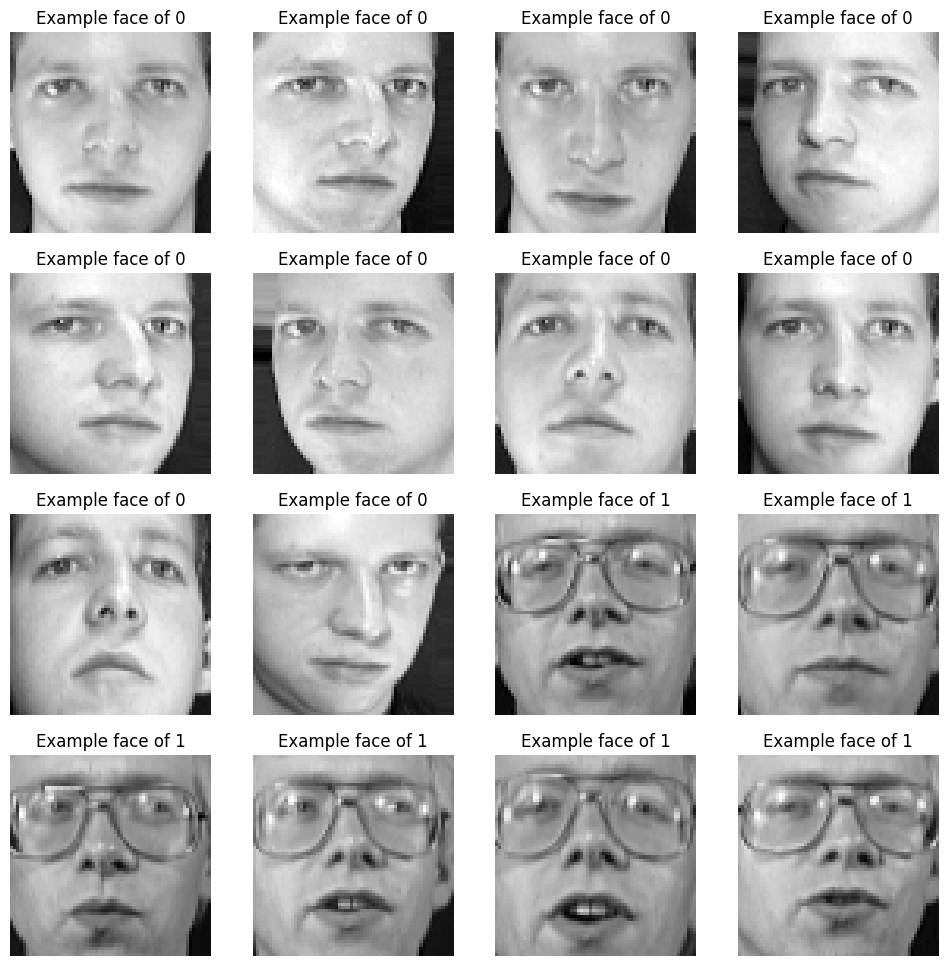

In [3]:
# Display sample images from the dataset
plt.figure(figsize=(12, 12))  # Create a new figure with a size of 12x12 inches

# Loop to display 16 sample images
for i in range(16):
    # Create a 4x4 grid of subplots and set the current subplot to (i + 1)
    plt.subplot(4, 4, i + 1)
    # Display the i-th image from the tensor in grayscale
    plt.imshow(tensor[:, :, i], cmap='gray')
    # Set the title of the subplot to the label of the i-th image
    plt.title(f"Example face of {labels_array[i]}")
    plt.axis('off')  # Hide the axis for a cleaner look

plt.show()  # Render the figure with all subplots


In [4]:
# Create training indices for the dataset
# `counter_all` counts the number of occurrences of each class label
counter_all = Counter(labels_array)
# Initialize an empty list to store the indices for training samples
training_idx = []

# Iterate through each class label
for class_name in counter_all:
    Kc = 7  # Number of samples per class to be used for training
    count_class = 0  # Counter to keep track of the number of training samples added for the current class

    # Iterate through all labels to find indices for the current class
    for i, label in enumerate(labels_array):
        if label == class_name and count_class < Kc:
            # Append the index `i` to `training_idx` if it matches the current class
            training_idx.append(i)
            # Increment the count of training samples for the current class
            count_class += 1


In [5]:
# Define training and testing data

# Extract the labels for the selected training indices
# `training_label` contains the labels corresponding to the indices in `training_idx`
training_label = np.array(labels_array)[training_idx]

# Generate a list of all indices in the dataset
all_idx = list(range(len(labels_array)))

# Determine testing indices by excluding training indices from the list of all indices
# `testing_idx` includes indices that are not present in `training_idx`
testing_idx = [x for x in all_idx if x not in training_idx]

# Extract the labels for the testing indices
# `testing_label` contains the labels corresponding to the indices in `testing_idx`
testing_label = np.array(labels_array)[testing_idx]

# Create tensors for training and testing sets
# `training_tensor` includes the images corresponding to the selected training indices
# `testing_tensor` includes the images corresponding to the testing indices
training_tensor = tensor[:, :, training_idx]
testing_tensor = tensor[:, :, testing_idx]

# Print the shapes of the training and testing tensors for verification
# `training_tensor.shape` gives the shape of the tensor used for training (height, width, num_training_samples)
# `testing_tensor.shape` gives the shape of the tensor


In [6]:
# Group indices by class for the training data

# Initialize a defaultdict where each key (class label) maps to a list of indices
# `training_group_indices` will collect the indices of training samples for each class
training_group_indices = defaultdict(list)

# Iterate through each index and label in the training labels
for idx, label in enumerate(training_label):
    # Append the index to the list corresponding to the class label in `training_group_indices`
    training_group_indices[label].append(idx)

# Convert `training_group_indices` from defaultdict to a regular dictionary
# This final dictionary maps each class label to a list of indices for that class
training_group_indices = dict(training_group_indices)


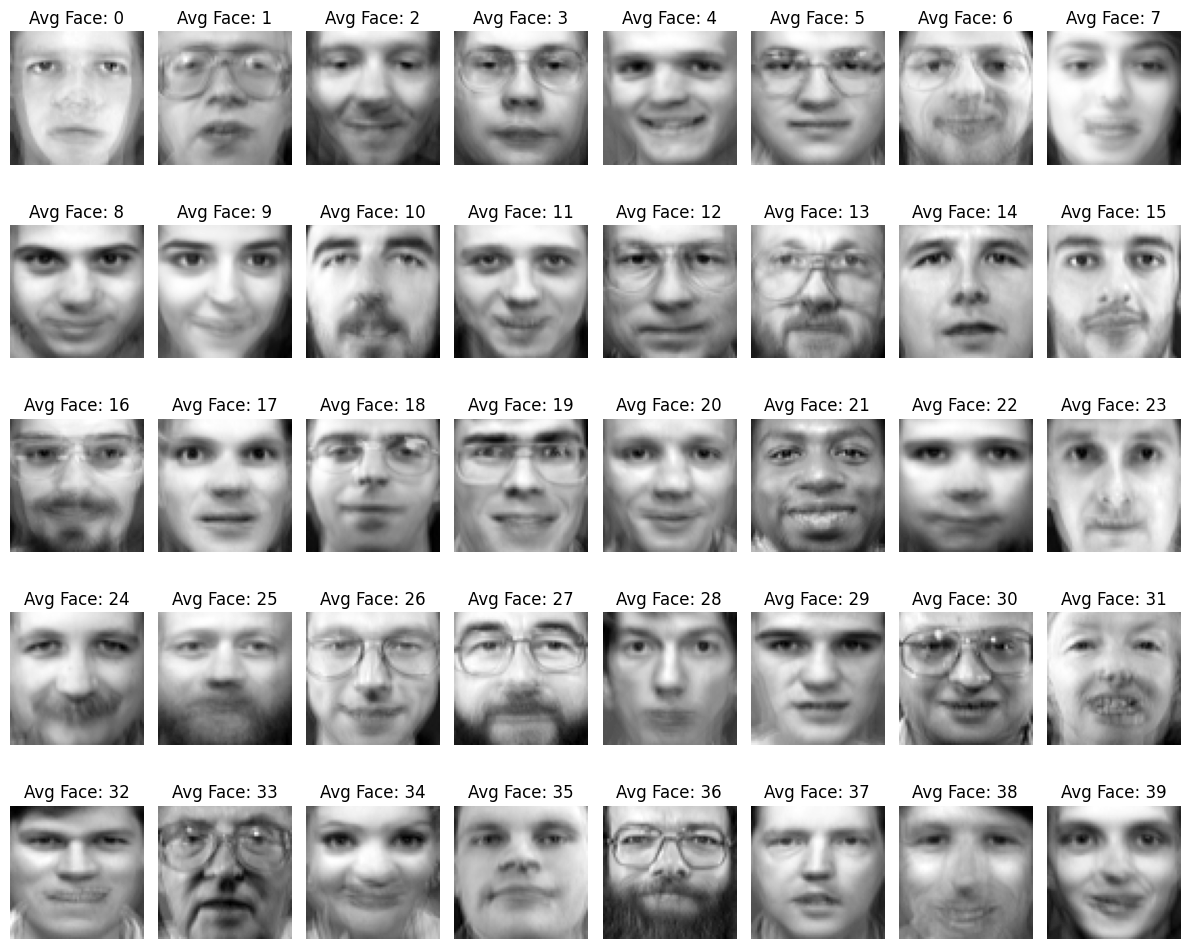

In [7]:
# Display average images for each class

# Create a subplot grid with 5 rows and 8 columns, resulting in a total of 40 subplots
# `fig` is the figure object and `axes` is an array of subplot axes
fig, axes = plt.subplots(5, 8, figsize=(12, 10))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Iterate through each class and its associated indices
for i, (key, indices) in enumerate(training_group_indices.items()):
    # Compute the average image for the current class
    # `np.mean` calculates the mean across the third dimension (sample dimension)
    avg_img = np.mean(training_tensor[:, :, indices], axis=2, keepdims=True)

    # Display the average image on the i-th subplot
    # `avg_img.squeeze()` removes the singleton dimension
    axes[i].imshow(avg_img.squeeze(), cmap='gray')
    # Set the title of the subplot to "Average face:" followed by the class label
    axes[i].set_title(f"Avg Face: {key}")
    axes[i].axis('off')  # Hide the axis for a cleaner look

# Adjust subplot layout to fit all images neatly
plt.tight_layout()
# Render the figure with all subplots
plt.show()


In [8]:
# Compute the mean tensor across all training images
# `mean_training_tensor` is the mean image computed by averaging across the sample dimension (axis=2)
mean_training_tensor = np.mean(training_tensor, axis=2)

# Initialize tensors to store mean images for each class and scaled mean images
# Shape: (height, width, num_samples)
training_tensor_mean = np.zeros_like(training_tensor)
# Shape: (height, width, num_samples)
training_tensor_mean2 = np.zeros_like(training_tensor)

# Iterate through each class and its associated indices
for key, indices in training_group_indices.items():
    # Compute the mean image for the current class by averaging across the sample dimension
    class_mean = np.mean(training_tensor[:, :, indices], axis=2, keepdims=True)

    # Store the class mean image in `training_tensor_mean` for the current class indices
    training_tensor_mean[:, :, indices] = class_mean

    # Compute the scaled mean image by subtracting the overall mean and scaling
    # The scaling factor is sqrt(number of samples in the class)
    training_tensor_mean2[:, :, indices] = (
        np.sqrt(len(indices)) * (class_mean - mean_training_tensor[:, :, np.newaxis]))

# Compute the variance tensor by subtracting the mean tensor from the original tensor
# This calculates the deviation of each image from the mean image of its class
training_tensor_variance = training_tensor - training_tensor_mean

# Print the shapes of the computed tensors for verification
print(f'Shape of mean training tensor by Class: {training_tensor_mean.shape}')
print(f'Shape of mean training tensor All: {mean_training_tensor.shape}')
print(f'Shape of variance training tensor: {training_tensor_variance.shape}')


Shape of mean training tensor by Class: (64, 64, 280)
Shape of mean training tensor All: (64, 64)
Shape of variance training tensor: (64, 64, 280)


In [9]:
# Initialize U matrices for tensor decomposition
# Define the size of the compressed dimension (e.g., number of components or latent dimensions)
compressed_sz = 16

# Set random seed for reproducibility of results
np.random.seed(42)
# Initialize the first U matrix (U1) with random values
# Shape: (height of images, compressed size)
U1 = np.random.rand(training_tensor_mean2.shape[0], compressed_sz)

# Set another random seed for reproducibility
np.random.seed(24)
# Initialize the second U matrix (U2) with random values
# Shape: (width of images, compressed size)
U2 = np.random.rand(training_tensor_mean2.shape[1], compressed_sz)

# Combine U1 and U2 into a list for easier management
U = [U1, U2]

# Print the shapes of the initialized U matrices for verification
print(f'Shape of U1: {U1.shape}')
print(f'Shape of U2: {U2.shape}')


Shape of U1: (64, 16)
Shape of U2: (64, 16)


In [10]:
# Optimization loop for updating the U matrices

# Perform optimization for a fixed number of iterations
for _ in range(30):
    # Iterate over the two modes (0 and 1) of the tensor
    for n in range(2):
        # Determine the complementary mode index
        negn = 1 - n

        # Compute z_n_var by projecting the variance tensor onto U[negn]
        # `tl.tenalg.mode_dot` performs the mode-n product of the tensor with the matrix U[negn].T
        z_n_var = tl.tenalg.mode_dot(
            training_tensor_variance, U[negn].T, mode=negn)
        # `S_wn` is the covariance matrix of the projected variance tensor
        S_wn = tl.unfold(z_n_var, n) @ tl.unfold(z_n_var, n).T

        # Compute z_n_mean by projecting the mean tensor onto U[negn]
        z_n_mean = tl.tenalg.mode_dot(
            training_tensor_mean2, U[negn].T, mode=negn)
        # `S_bn` is the covariance matrix of the projected mean tensor
        S_bn = tl.unfold(z_n_mean, n) @ tl.unfold(z_n_mean, n).T

        # Compute the scalar phi using the trace of the covariance matrices
        phi = np.trace(U[n].T @ S_bn @ U[n]) / np.trace(U[n].T @ S_wn @ U[n])
        # Compute the difference between the covariance matrices
        diff = S_bn - phi * S_wn

        # Perform eigenvalue decomposition on the difference matrix
        eigenvalues, eigenvectors = np.linalg.eigh(diff)
        # Sort eigenvalues in descending order and get the indices
        idx = np.argsort(eigenvalues)[::-1]
        # Select the top eigenvectors corresponding to the largest eigenvalues
        top_eigenvectors = eigenvectors[:, idx[:compressed_sz]]

        # Compute the covariance matrix XX_n for the mode-n unfolding of the original tensor
        XX_n = tl.unfold(training_tensor, n) @ tl.unfold(training_tensor, n).T
        # Compute the updated difference part2 using the top eigenvectors
        diff_part2 = top_eigenvectors @ top_eigenvectors.T @ XX_n @ top_eigenvectors @ top_eigenvectors.T

        # Perform eigenvalue decomposition on the updated difference matrix
        eigenvalues, eigenvectors = np.linalg.eigh(diff_part2)
        # Sort eigenvalues in descending order and get the indices
        idx = np.argsort(eigenvalues)[::-1]
        # Select the final eigenvectors corresponding to the largest eigenvalues
        final_eigenvectors = eigenvectors[:, idx[:compressed_sz]]

        # Update U[n] with the final eigenvectors for mode-n
        U[n] = final_eigenvectors


In [11]:
# Project the training tensor onto the subspace defined by U matrices

# Project the training tensor onto the subspace defined by U[0]
# `tl.tenalg.mode_dot` performs the mode-n product of the tensor with U[0].T for mode 0
G_1 = tl.tenalg.mode_dot(training_tensor, U[0].T, mode=0)

# Further project G_1 onto the subspace defined by U[1]
# This combines the effects of both U[0] and U[1] on the training tensor
G_training = tl.tenalg.mode_dot(G_1, U[1].T, mode=1)

# Project the testing tensor onto the subspace defined by U[0]
G_2 = tl.tenalg.mode_dot(testing_tensor, U[0].T, mode=0)

# Further project G_2 onto the subspace defined by U[1]
# This ensures that the testing tensor is transformed in the same way as the training tensor
G_testing = tl.tenalg.mode_dot(G_2, U[1].T, mode=1)

# Print the shapes of the original and projected tensors for verification
print(f'Shape of Original training tensor: {training_tensor.shape}')
print(f'Shape of G_training tensor: {G_training.shape}')


Shape of Original training tensor: (64, 64, 280)
Shape of G_training tensor: (16, 16, 280)


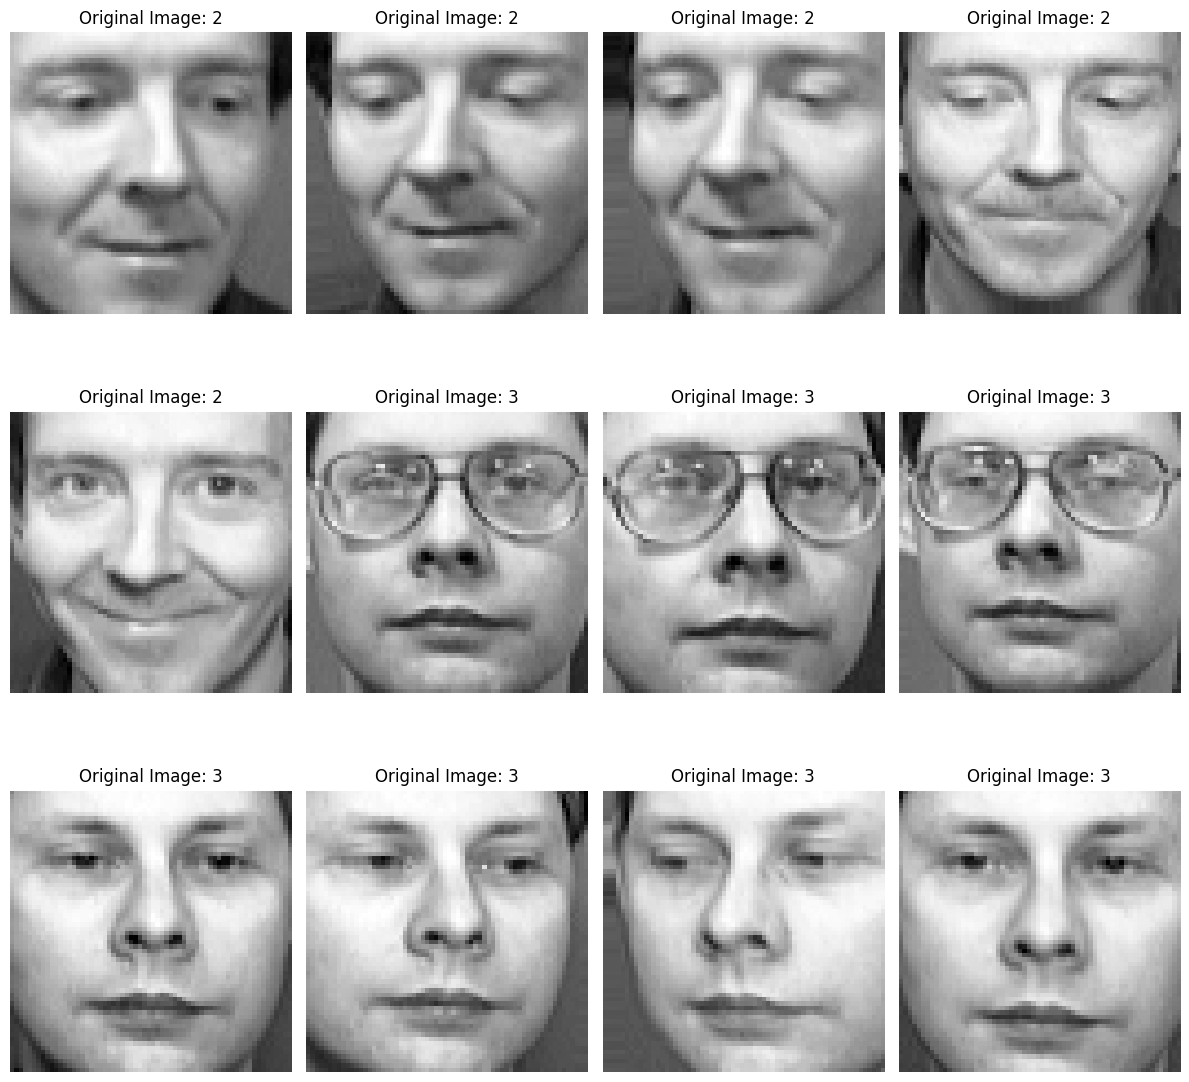

In [12]:
# Display original images from the training set
plt.figure(figsize=(12, 12))  # Set the figure size for better visualization
for i in range(12):
    # Create a subplot for each image in a 3x4 grid
    plt.subplot(3, 4, i + 1)
    # Display the image from the original training tensor
    # The images displayed are from index i+16 to skip the first 16 images
    plt.imshow(training_tensor[:, :, i + 16], cmap='gray')
    # Set the title of each subplot to the corresponding label

    plt.title(f"Original Image: {training_label[i + 16]}")
    # Hide the axis for a cleaner look
    plt.axis('off')
# Adjust layout to ensure subplots fit into the figure area
plt.tight_layout()
# Show the figure
plt.show()


## Train SVM classifier using the training features $\mathbf{G}^{(k)}$.

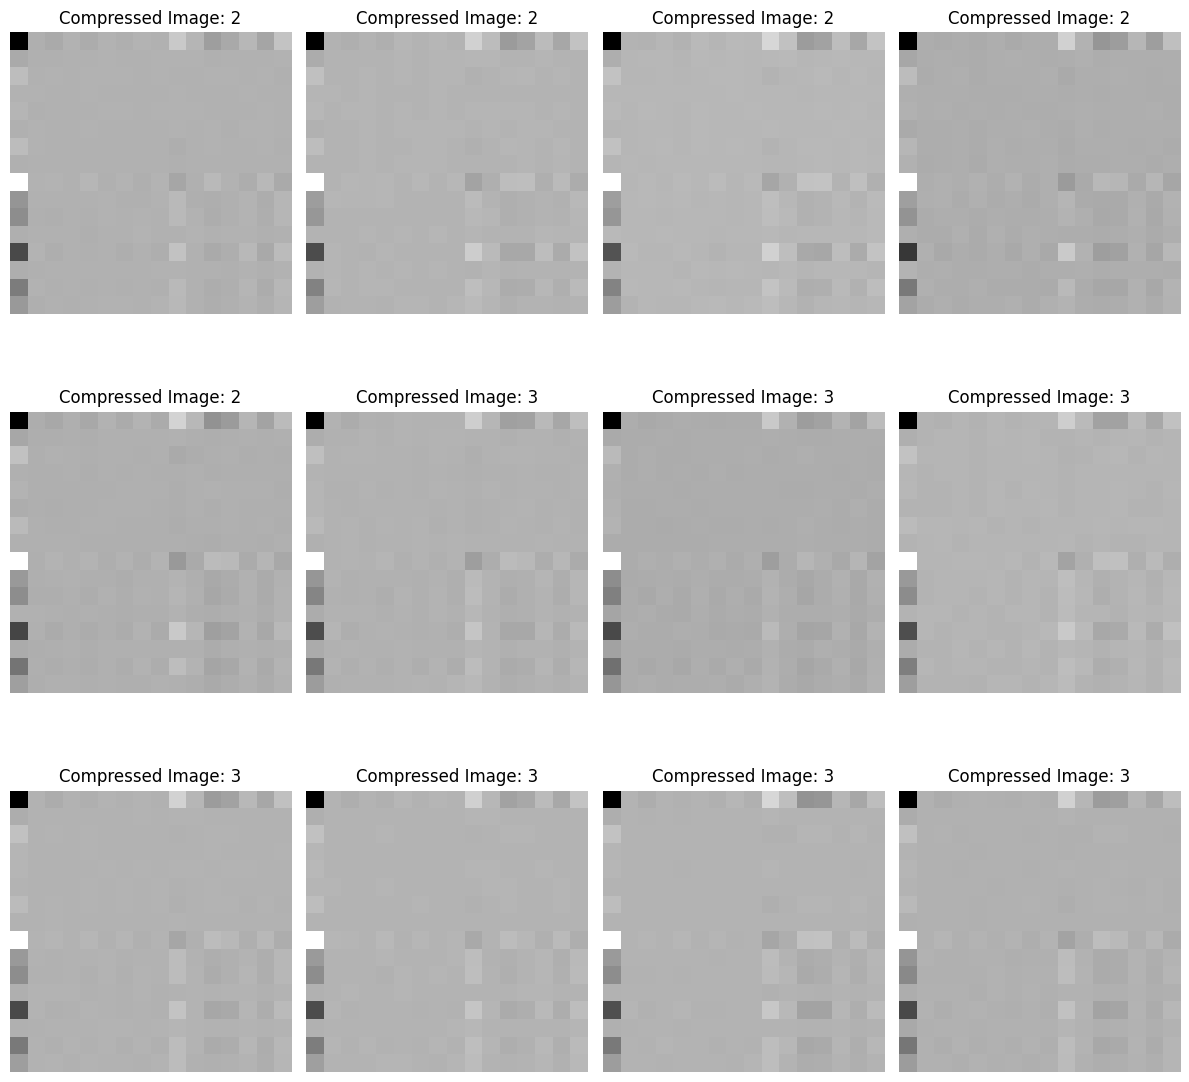

In [13]:
# Display compressed images from the training set
plt.figure(figsize=(12, 12))  # Set the figure size for better visualization

for i in range(12):
    # Create a subplot for each image in a 3x4 grid
    plt.subplot(3, 4, i + 1)

    # Display the compressed image from the G_training tensor
    # The images displayed are from index i+16 to skip the first 16 images
    plt.imshow(G_training[:, :, i + 16], cmap='gray')

    # Set the title of each subplot to the corresponding label
    plt.title(f"Compressed Image: {training_label[i + 16]}")

    # Hide the axis for a cleaner look
    plt.axis('off')

# Adjust layout to ensure subplots fit into the figure area
plt.tight_layout()

# Show the figure
plt.show()


In [14]:
print(f'Shape of G_testing tensor: {G_testing.shape}')


Shape of G_testing tensor: (16, 16, 120)


In [15]:
# Prepare data for SVM
# Reshape the compressed training tensor to a 2D array where each row is a flattened image
# `compressed_sz * compressed_sz` is the number of features (pixels) in each image after compression
# `len(training_label)` is the number of training samples
reshaped_G_training = G_training.reshape(
    compressed_sz * compressed_sz, len(training_label)).T

# Reshape the compressed testing tensor to a 2D array similar to the training data
# `compressed_sz * compressed_sz` is the number of features (pixels) in each image after compression
# `len(testing_label)` is the number of testing samples
reshaped_G_testing = G_testing.reshape(
    compressed_sz * compressed_sz, len(testing_label)).T

# Print the shapes of the reshaped training and testing data
# This helps in verifying that the reshaping was done correctly
print(f'Shape of reshaped_G_training: {reshaped_G_training.shape}')
print(f'Shape of reshaped_G_testing: {reshaped_G_testing.shape}')


Shape of reshaped_G_training: (280, 256)
Shape of reshaped_G_testing: (120, 256)


In [16]:
# Train SVM classifier
sv_classifier = SVC(kernel='linear', random_state=42)
sv_classifier.fit(reshaped_G_training, training_label)
score_svm = sv_classifier.score(reshaped_G_testing, testing_label)



Accuracy score of the testing data is (SVM): 0.925


Classification Performance (SVM):
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.67      0.67      0.67    

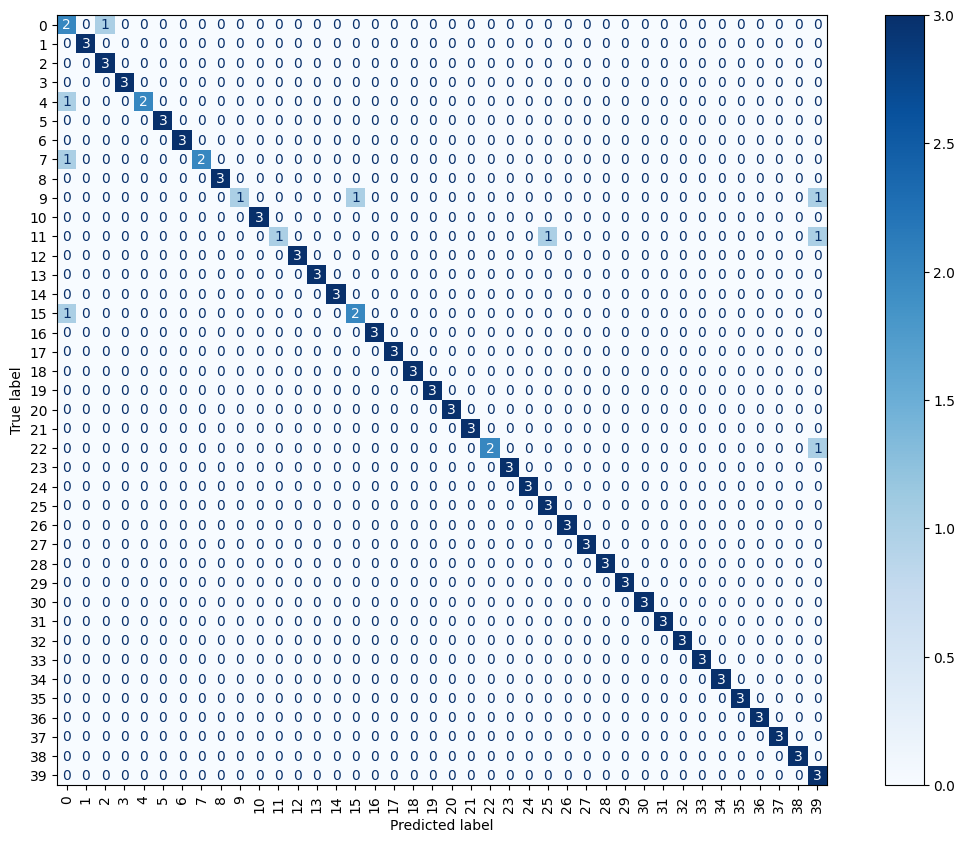

In [17]:
# Print the accuracy score of the SVM classifier on the testing data
print(f'\nAccuracy score of the testing data is (SVM): {score_svm}\n')

# Print the classification performance report
print('\nClassification Performance (SVM):')
# Generate and print the classification report for the testing data
print(classification_report(testing_label,
      sv_classifier.predict(reshaped_G_testing)))

# Print the confusion matrix for the SVM classifier
print('\nConfusion Matrix (SVM):')
# Compute the confusion matrix based on the true labels and the predicted labels
SVM_CM = confusion_matrix(
    testing_label, sv_classifier.predict(reshaped_G_testing))

# Create a subplot for the confusion matrix
fig, ax = plt.subplots(figsize=(15, 10))
# Create and plot the confusion matrix display
CM_disp = ConfusionMatrixDisplay(
    confusion_matrix=SVM_CM, display_labels=sv_classifier.classes_)
CM_disp.plot(ax=ax, cmap='Blues')

# Rotate the x-axis tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the confusion matrix plot
plt.show()


# **Conclusion**

In this notebook, we have delved into advanced techniques for **feature extraction** and **classification** using **Higher Order Discriminant Analysis (HODA)** and **tensor decompositions**, as outlined in the paper [**"Tensor Decompositions for Feature Extraction and Classification of High-Dimensional Datasets" by Anh-Huy Phan and Andrzej Cichocki**](https://www.researchgate.net/publication/228553771_Tensor_decompositions_for_feature_extraction_and_classification_of_high_dimensional_datasets). Traditional methods often struggle with high-dimensional data, such as facial recordings and multiview images, due to the curse of dimensionality. The paper introduces a range of algorithms utilizing tensor representations and decompositions to overcome these challenges.

Key findings include:

1. **Tensor Decomposition and Feature Extraction**: We demonstrated that tensor decompositions, particularly the TUCKER and PARAFAC models, effectively capture multi-linear and multi-aspect structures within large-scale datasets. By decomposing input data tensors, we extracted significant features essential for accurate classification.

2. **Higher Order Discriminant Analysis (HODA)**: The HODA algorithm aims to maximize class separation while minimizing within-class scatter. Formulated as an optimization problem, it involves identifying basis matrices that optimize the discriminant ratio. This  notebook confirmed that HODA enhances classification performance by preserving the data's inherent multi-dimensional structure.

3. **Algorithmic Implementation**: The algorithm involves initializing feature tensors, calculating scatter matrices, and updating basis matrices through eigenvalue decomposition. This iterative process refines features and improves classification accuracy.

4. **Empirical Validation**: The proposed algorithms were validated on benchmark datasets, showing their effectiveness in managing high-dimensional data. Notably, using orthogonal and nonnegative constraints in tensor decompositions, and applying a multinomial SVM for classification, achieved an accuracy of 0.925 with compressed images of size 4x4 compared to the original 8x8 size. This further demonstrates the robustness of our methods.

In summary, integrating tensor decompositions with HODA creates a robust framework for feature extraction and classification in high-dimensional settings. This approach not only addresses the limitations of traditional techniques but also offers a scalable solution for complex data analysis, reducing computational time and power while mitigating the risk of overfitting. Future research will explore extending these techniques to other high-dimensional data types and investigating additional constraints and optimizations to further enhance performance.


> ## **Appendix** - Eigenface Generation and Analysis using PCA on the Olivetti Faces Dataset
>
> ## **Problem Statement:**
>
> This notebook illustrates the use of Principal Component Analysis (PCA) for face recognition using the Olivetti faces dataset. The goal is to generate "eigenfaces" for each individual in the dataset by extracting the principal components from their face images. The eigenfaces represent the most significant features of the faces, capturing the essential variations in the dataset, which can be used for analysis later.
>
> ### **Steps Involved:**
>
> 1. **Data Preprocessing**:
>    - Load the Olivetti faces dataset.
>    - Convert the images to a suitable format and structure the data for analysis.
>
> 2. **Mean Face Calculation**:
>    - For each person, compute the mean face from their set of images.
>    - Center the face images by subtracting the mean face from each image, resulting in a centered dataset.
>
> 3. **Eigenface Computation**:
>    - Reshape the centered face images for PCA.
>    - Apply PCA to the reshaped data to extract the principal components, which represent the eigenfaces.
>
> 4. **Visualization**:
>    - Visualize the original face images and the computed mean faces for each individual.
>    - Display the top eigenfaces for each person, showing the principal components that capture the most significant features of the face images.
>
> ### **Objectives:**
> - Understand the application of PCA in dimensionality reduction and feature extraction.
> - Generate eigenfaces for individuals in the dataset to identify the key features that differentiate their face images.
> - Visualize the original, mean, and eigenface images to gain insights into the data's structure and the PCA results.
>
> This notebook demonstrates a simplified approach to face recognition by focusing on the generation and visualization of eigenfaces, highlighting the power of PCA in identifying and extracting significant features from the face datasets.


In [18]:
# Import necessary libraries
from sklearn.decomposition import PCA
import copy


In [19]:
# Get unique labels and their corresponding indices
unique_labels = np.unique(labels_array)
label_indices = {label: np.where(labels_array == label)[
    0] for label in unique_labels}

# Reshape the tensor for further processing
reshaped_tensor = tensor.reshape((-1, 400))
print(f'Reshaped Tensor Shape: {reshaped_tensor.shape}')

# Initialize arrays for group means and centered tensor
group_means = np.zeros((4096, len(label_indices)))
centered_tensor = np.zeros_like(reshaped_tensor)

# Center the data by subtracting the mean face for each label
for idx, (label, indices) in enumerate(label_indices.items()):
    group_tensor = reshaped_tensor[:, indices]
    group_mean = np.mean(group_tensor, axis=1)
    group_means[:, idx] = group_mean
    centered_tensor[:, indices] = reshaped_tensor[:,
                                                  indices] - group_mean[:, np.newaxis]

# Print the shape of the group means
print(f'Group Means Shape: {group_means.shape}')


Reshaped Tensor Shape: (4096, 400)
Group Means Shape: (4096, 40)


In [20]:
# Set the number of PCA components
PCA_number = 6
pca_results = {}

# Perform PCA for each group defined by the labels
for label, indices in label_indices.items():
    group_images = copy.deepcopy(reshaped_tensor[:, indices])
    pca = PCA(n_components=PCA_number)
    transformed_images = pca.fit_transform(group_images)
    pca_results[label] = transformed_images.T


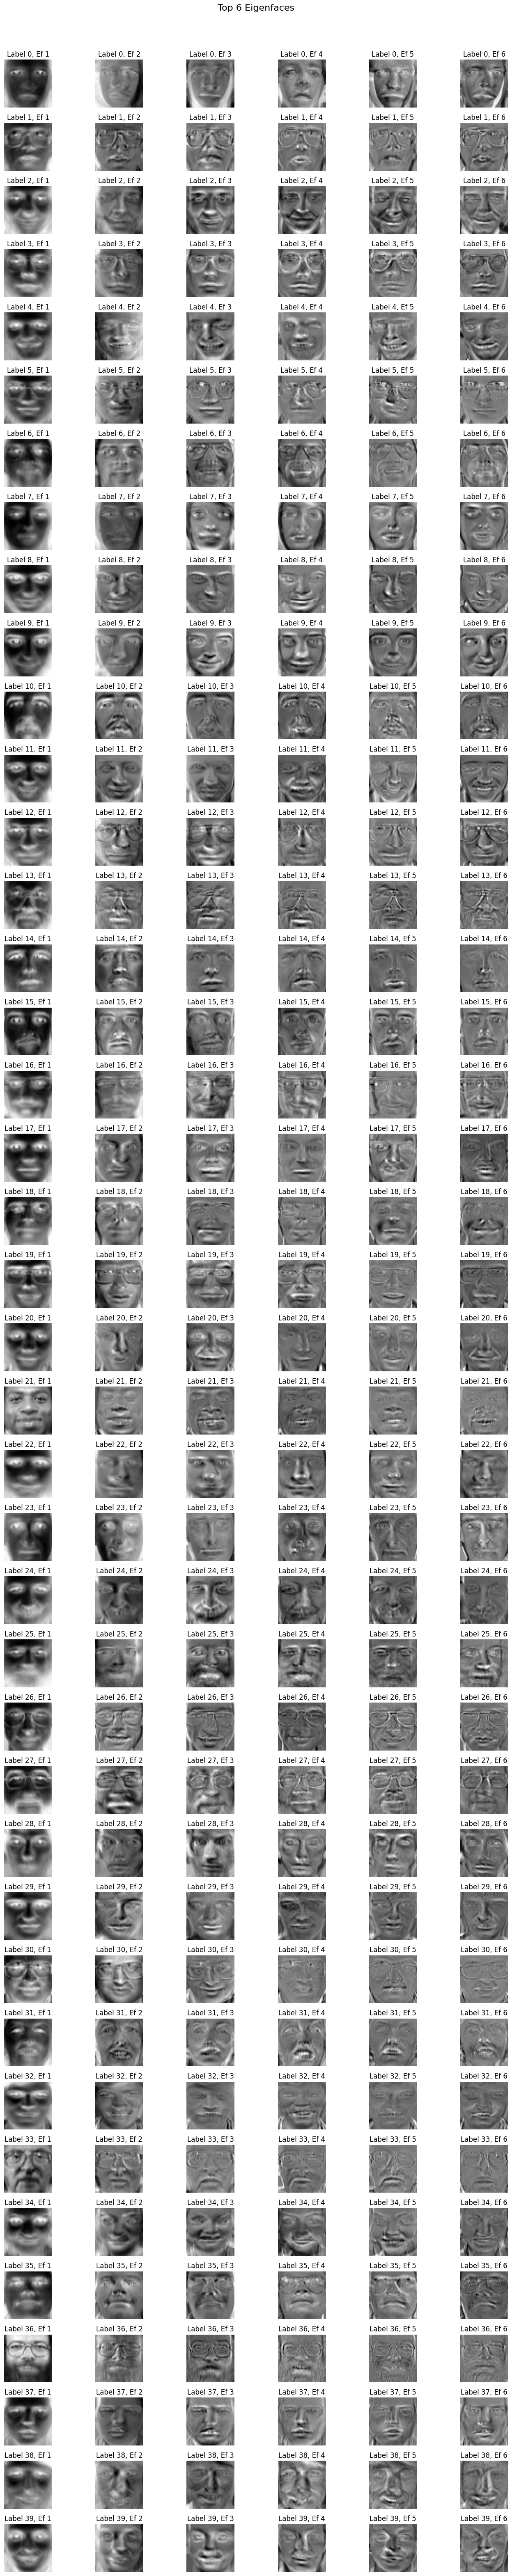

In [21]:
# Plot the top PCA components (eigenfaces) for each label
fig, axs = plt.subplots(nrows=len(pca_results),
                        ncols=PCA_number, figsize=(14, 64))
for idx in range(len(pca_results)):
    images = pca_results[idx]
    for col in range(len(images)):
        image = images[col]
        reshaped_image = image.reshape((64, 64))
        axs[idx, col].imshow(reshaped_image, cmap='gray')
        axs[idx, col].set_title(f'Label {idx}, Ef {col+1}')
        axs[idx, col].axis('off')
plt.suptitle(f'Top {PCA_number} Eigenfaces', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
